In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy import signal

from sklearn.decomposition import FastICA, PCA

In [127]:
# GENERATE SAMPLE DATA
np.random.seed(0)
num_samples = 1000
time = np.linspace(0,8, num_samples)

In [128]:
s1 = np.sin(time)
s2 = np.sign (np.sin(2*time))
s3 = signal.gausspulse(time, fc=1)

In [129]:
S = np.c_[s1, s2, s3]
S += 0.2*np.random.normal(size=S.shape) #Add noise

In [130]:
S /= S.std(axis=0) #Standartize data
#Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

In [131]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

In [132]:
# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

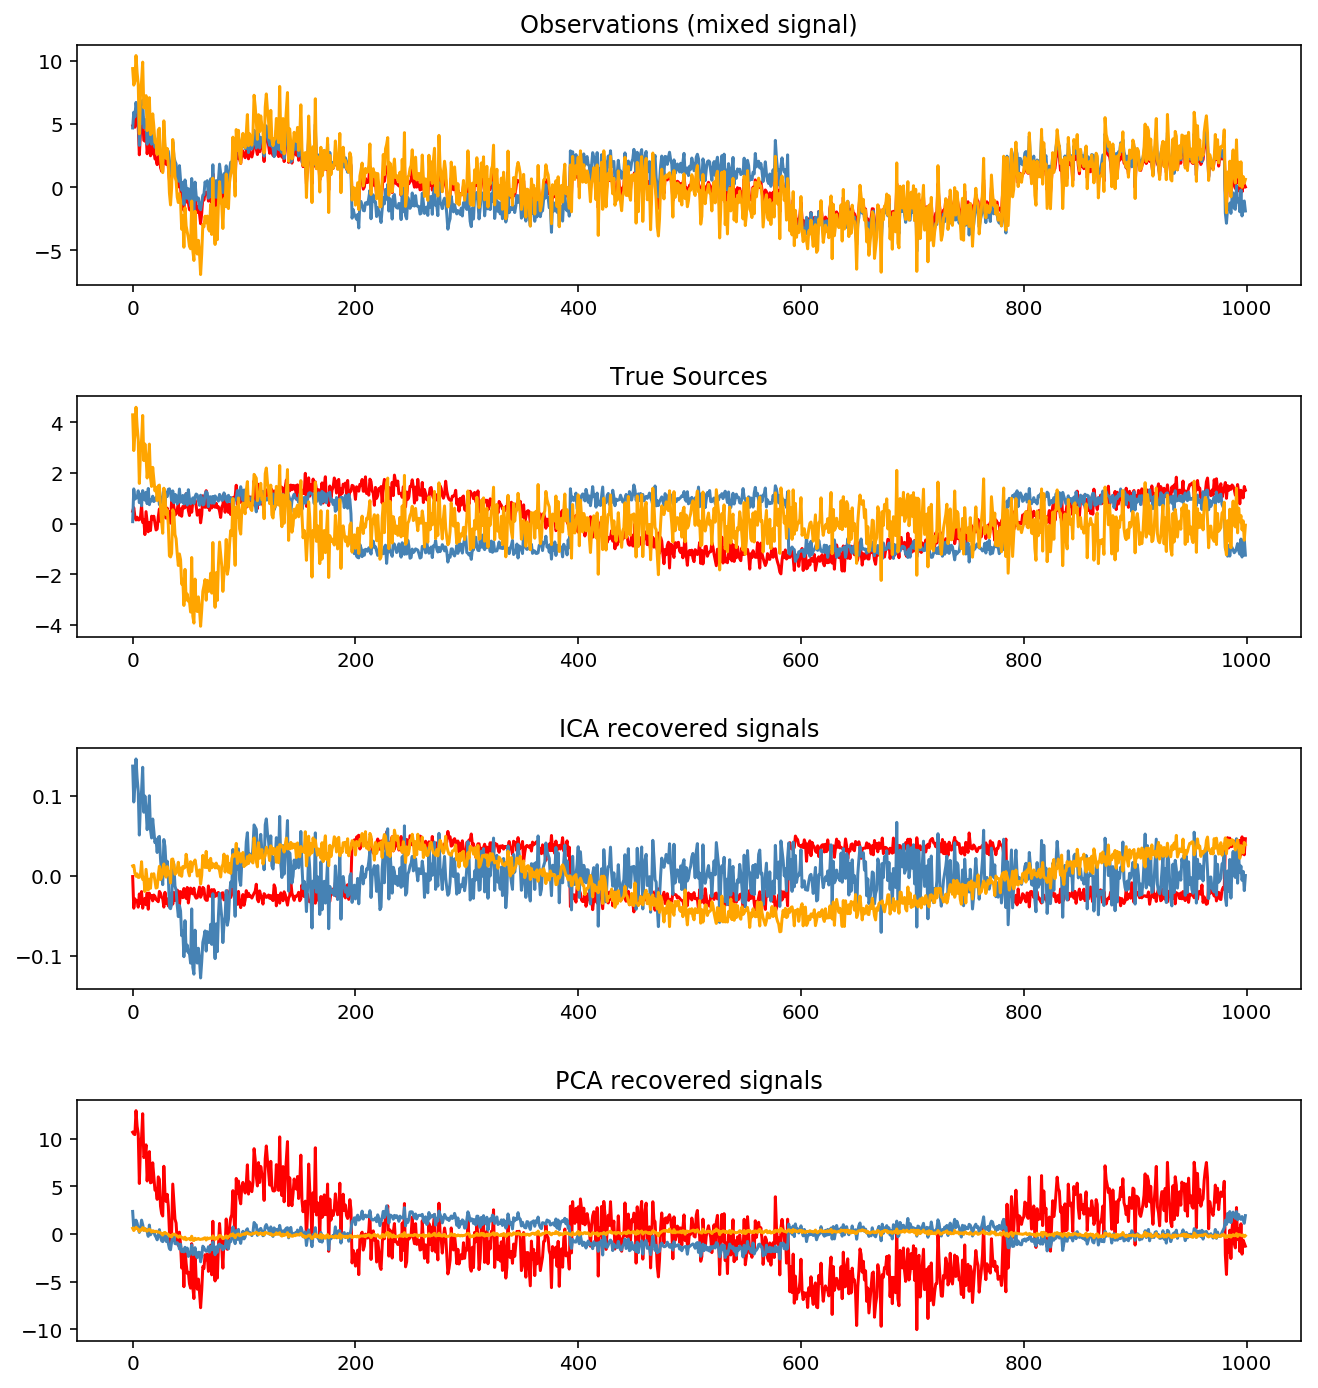

In [133]:
plt.figure(figsize=(10,10))

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()